In [4]:
# Zadanie 1
# 1. Napisz funkcję do wczytywania waluty nbp z zadanego okresu (wszystko przekazywane jako parametr)
#    dowolny ze sposobów (plik csv, read_json, dowolne inne)
# 2. Używając stworzonej funkcji wczytaj dane dwóch wybranych przez siebie kursów
# 3. Zbadaj wczytane dane za pomocą wybranych poleceń, oczyść jeżeli to konieczne i ustaw indeksy na datę.
#    Plus za konwersję do typu data/czas
# 4. Użyj funkcji corrcoef z pakietu numpy żeby obliczyć wzajemną korelację wybranych kursów
# 5. Zweryfikuj związek z punktu wyżej rysując wykresy obydwu wybranych przez siebie walut
#    Plus za wykorzystanie funkcji plt.subplot()

Kurs NBP waluty USD
  effectiveDate     mid              no
0    2019-09-02  3.9819  169/A/NBP/2019
1    2019-09-03  3.9882  170/A/NBP/2019
2    2019-09-04  3.9414  171/A/NBP/2019
3    2019-09-05  3.9330  172/A/NBP/2019
4    2019-09-06  3.9315  173/A/NBP/2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
effectiveDate    5 non-null object
mid              5 non-null float64
no               5 non-null object
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes
None
            mid
count  5.000000
mean   3.955200
std    0.027599
min    3.931500
25%    3.933000
50%    3.941400
75%    3.981900
max    3.988200

Dane po konwersji:
         effectiveDate     mid              no
0  2019-09-02/00:00:00  3.9819  169/A/NBP/2019
1  2019-09-03/00:00:00  3.9882  170/A/NBP/2019
2  2019-09-04/00:00:00  3.9414  171/A/NBP/2019
3  2019-09-05/00:00:00  3.9330  172/A/NBP/2019
4  2019-09-06/00:00:00  3.9315  173/A/NBP/2019
<class 'pandas.core.frame.

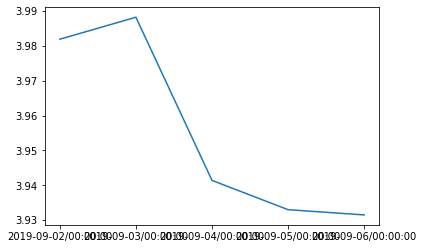


Kurs NBP waluty EUR
  effectiveDate     mid              no
0    2019-09-02  4.3691  169/A/NBP/2019
1    2019-09-03  4.3667  170/A/NBP/2019
2    2019-09-04  4.3385  171/A/NBP/2019
3    2019-09-05  4.3409  172/A/NBP/2019
4    2019-09-06  4.3392  173/A/NBP/2019


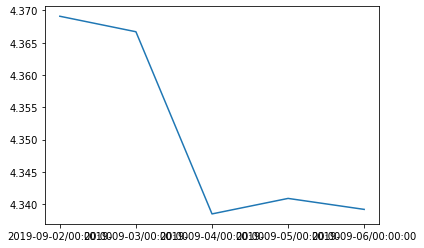

[[1.         0.97515429]
 [0.97515429 1.        ]]


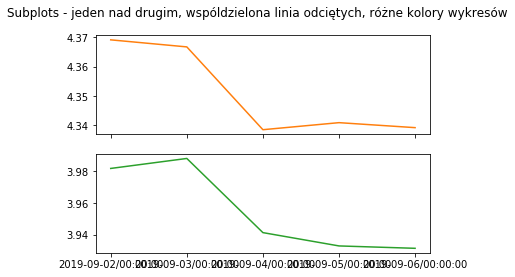

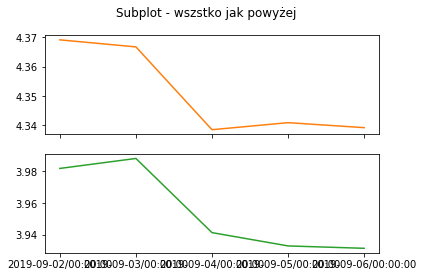

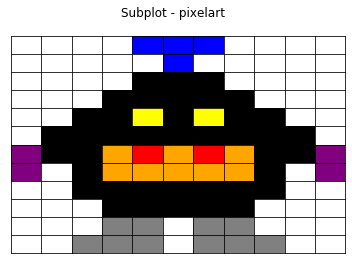

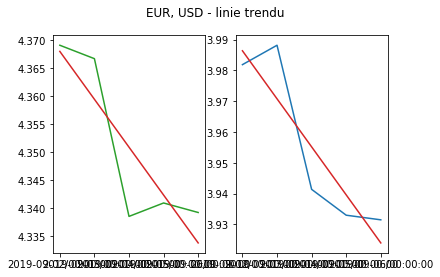

In [33]:
# Zadanie 1
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
import matplotlib.gridspec as gridspec

# Zadanie 1
# 1. Napisz funkcję do wczytywania waluty nbp z zadanego okresu (wszystko przekazywane jako parametr)
#    dowolny ze sposobów (plik csv, read_json, dowolne inne)

def wczytaj_walute(waluta,od,do):
    currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/'+waluta+'/'+od+'/'+do+'/')
    currency_data = currency_req.json()
    return currency_data['rates']

# Funkcja zamieniająca id koloru na tekstowy kod
def podaj_kolor(id):
    kolory = ['white','black','grey','lightgrey','yellow','blue','green','red','orange','purple']
    return kolory[id]


# 2. Używając stworzonej funkcji wczytaj dane dwóch wybranych przez siebie kursów
# 3. Zbadaj wczytane dane za pomocą wybranych poleceń, oczyść jeżeli to konieczne i ustaw indeksy na datę.
#    Plus za konwersję do typu data/czas
print("Kurs NBP waluty USD")
rates = wczytaj_walute('USD','2019-09-01','2019-09-08')
#print(rates)
kursy_usd = pd.DataFrame.from_dict(rates)
print(kursy_usd.head())
print(kursy_usd.info())
print(kursy_usd.describe())

# Nie za bardzo zrozumiałem o co chodzi z tą konwersją data/czas
# więc zamieściłem 2 konwersje (do wyboru)

# 1) Zamina daty na Epoch timestamp
# kursy_usd['effectiveDate'] = (pd.to_datetime(kursy_usd['effectiveDate']).astype(np.int64)/(10**9)).astype(np.uint32)

# 2) Zamiana daty na formatowany datetime (data/czas)
kursy_usd['effectiveDate'] = pd.to_datetime(kursy_usd['effectiveDate']).dt.strftime('%Y-%m-%d/%H:%M:%S')

#sprawdzamy czy dane mają prawidłowy typ i wartości
print("\nDane po konwersji:")
print(kursy_usd.head())
print(kursy_usd.info())

# index na datę
dane_wykres_usd = kursy_usd.set_index(['effectiveDate'])['mid']

plt.plot(dane_wykres_usd)
plt.show()

print("\nKurs NBP waluty EUR")
rates = wczytaj_walute('EUR','2019-09-01','2019-09-08')
#print(rates)
kursy_eur = pd.DataFrame.from_dict(rates)
print(kursy_eur.head())

# i znowu do wyboru:
# 1) Zamina daty na Epoch timestamp
#kursy_eur['effectiveDate'] = (pd.to_datetime(kursy_eur['effectiveDate']).astype(np.int64)/(10**9)).astype(np.uint32)

# 2) Zamiana daty na formatowany datetime (data/czas)
kursy_eur['effectiveDate'] = pd.to_datetime(kursy_eur['effectiveDate']).dt.strftime('%Y-%m-%d/%H:%M:%S')

dane_wykres_eur = kursy_eur.set_index(['effectiveDate'])['mid']
plt.plot(dane_wykres_eur)
plt.show()

# 4. Użyj funkcji corrcoef z pakietu numpy żeby obliczyć wzajemną korelację wybranych kursów
print(np.corrcoef(dane_wykres_usd,dane_wykres_eur))

# 5. Zweryfikuj związek z punktu wyżej rysując wykresy obydwu wybranych przez siebie walut
#    Plus za wykorzystanie funkcji plt.subplot()

# wykorzystanie subplots
rysunek, (gora, dol) = plt.subplots(2, sharex=True)
rysunek.suptitle('Subplots - jeden nad drugim, wspóldzielona linia odciętych, różne kolory wykresów')
dol.plot(dane_wykres_usd, 'tab:green')
gora.plot(dane_wykres_eur, 'tab:orange')
plt.show()

# inne podejście (subplot)
plt.suptitle('Subplot - wszstko jak powyżej')
dol = plt.subplot(212)
plt.plot(dane_wykres_usd, 'tab:green')
# inaczej zapisane
gora = plt.subplot(2,1,1, sharex=dol)
# ukrycie labeli x górnego wykresu - z subplots niepotrzebne
plt.setp(gora.get_xticklabels(), visible=False)
plt.plot(dane_wykres_eur, 'tab:orange')
plt.show()

# pixelart - tak dla zabawy ;)
subploty = [
    0,0,0,0,5,5,5,0,0,0,0,
    0,0,0,0,0,5,0,0,0,0,0,
    0,0,0,0,1,1,1,0,0,0,0,
    0,0,0,1,1,1,1,1,0,0,0,
    0,0,1,1,4,1,4,1,1,0,0,
    0,1,1,1,1,1,1,1,1,1,0,
    9,1,1,8,7,8,7,8,1,1,9,
    9,0,1,8,8,8,8,8,1,0,9,
    0,0,1,1,1,1,1,1,1,0,0,
    0,0,0,1,1,1,1,1,0,0,0,
    0,0,0,2,2,0,2,2,0,0,0,
    0,0,2,2,2,0,2,2,2,0,0
]
pixart = plt.figure()
gs1 = gridspec.GridSpec(12, 11)
# usuwamy odstępy
gs1.update(wspace=0, hspace=0)
plt.suptitle('Subplot - pixelart')
# rysujemy
i = 0
plus = lambda i : i + 1
for kolor in subploty:
    plt.subplot(gs1[i], facecolor = podaj_kolor(kolor), xticks =[], yticks =[])
    #i += 1
    # zamiast tego funkcja lambda... tylko po co ;)
    i = plus(i)
plt.show()

# linie trendu walut
plt.suptitle('EUR, USD - linie trendu')
lewy = plt.subplot(121)
plt.plot(dane_wykres_eur, 'tab:green')
x = np.arange(len(dane_wykres_eur), dtype=int)
a, b = np.polyfit(x, dane_wykres_eur, 1)
y = a*x+b
plt.plot(x, y, 'tab:red')
prawy = plt.subplot(122)
plt.plot(dane_wykres_usd, 'tab:blue')
x = np.arange(len(dane_wykres_usd), dtype=int)
a, b = np.polyfit(x, dane_wykres_usd, 1)
y = a*x+b
plt.plot(x, y, 'tab:red')
plt.show()